In [220]:
import pandas as pd
import numpy as np

In [221]:
chemicals = pd.read_csv("chemicals.csv")
earnings = pd.read_csv("earnings.csv", encoding = "ISO-8859-1")
industry_occupation = pd.read_csv("industry_occupation.csv", encoding = "ISO-8859-1")


In [222]:
chem_score = pd.read_csv("chem_score.csv")

In [223]:
chemicals["fips"] = chemicals['fips'].apply(lambda x: '{0:0>5}'.format(x))
chemicals.fips.apply(str)
earnings['fips'] = earnings['fips'].apply(lambda x: '{0:0>5}'.format(x))
earnings.fips.apply(str)
industry_occupation["fips"] = industry_occupation['fips'].apply(lambda x: '{0:0>5}'.format(x))
industry_occupation.fips.apply(str)
earnings.to_csv("earnings_updated_fips.csv")

In [224]:
for col in industry_occupation.columns[4:len(industry_occupation.columns) - 1]:
    industry_occupation[col] /= industry_occupation.total_employed
for col in industry_occupation.columns[4:len(industry_occupation.columns) - 1]:
    industry_occupation[col] = industry_occupation[col].fillna(industry_occupation.groupby('year')[col].transform("mean"))
industry_occupation.to_csv("industry_updated_fips.csv")

In [225]:
industry_occupation = industry_occupation.drop("total_employed", 1)
industry_occupation_lag = industry_occupation.copy()

In [226]:
industry_occupation['year'] += 1

In [227]:
industry_occupation.year = industry_occupation.year.apply(str)

In [228]:
industry_occupation["new_index"] = industry_occupation.year + industry_occupation.geo_id

In [229]:
industry_occupation_lag.year = industry_occupation_lag.year.apply(str)
industry_occupation_lag['new_index'] = industry_occupation_lag.year + industry_occupation_lag.geo_id

In [230]:
industry_occupation = industry_occupation.set_index(['new_index'])

In [231]:
industry_occupation_lag = industry_occupation_lag.set_index(['new_index'])

In [232]:
new_col = [industry_occupation_lag.columns[i] + '_1' for i in range(len(industry_occupation_lag.columns))]

In [233]:
industry_occupation_lag.columns = new_col

In [252]:
result = pd.concat([industry_occupation, industry_occupation_lag], axis=1, join='inner')

In [255]:
result = result.reset_index()
result = result.drop(['geo_id_1', 'fips_1', 'county_1', 'year_1', 'new_index'], axis = 1)

In [257]:
result.to_csv("Industry_lag.csv")

In [280]:
## earnings 

normalized_earnings = pd.read_csv("normalized_earnings.csv")
normalized_earnings.year = normalized_earnings.year.apply(int)

In [281]:
normalized_earnings_lag = normalized_earnings.copy()
normalized_earnings.year += 1
normalized_earnings.year = normalized_earnings.year.apply(str)
normalized_earnings.fips = normalized_earnings.fips.apply(str)
normalized_earnings["new_index"] = normalized_earnings.year + normalized_earnings.fips

In [282]:
normalized_earnings_lag.year = normalized_earnings_lag.year.apply(str)
normalized_earnings_lag.fips = normalized_earnings_lag.fips.apply(str)
normalized_earnings_lag["new_index"] = normalized_earnings_lag.year + normalized_earnings_lag.fips

In [283]:
normalized_earnings = normalized_earnings.set_index(['new_index'])
normalized_earnings_lag = normalized_earnings_lag.set_index(['new_index'])
new_col = [normalized_earnings_lag.columns[i] + '_1' for i in range(len(normalized_earnings_lag.columns))]
normalized_earnings_lag.columns = new_col
result2 = pd.concat([normalized_earnings, normalized_earnings_lag], axis = 1, join = "inner")


In [285]:
result2 = result2.reset_index()
result2 = result2.drop(['new_index', 'year_1'], axis = 1)

In [286]:
result2.to_csv("normalized_earnings_lag.csv")

In [292]:
result2.head()

,index,fips,total_agri_fish_mine,agri_fish_hunt,mining_quarrying_oilgas_extract,construction,manufacturing,wholesale_trade,retail_trade,transport_warehouse_utilities,...,mgmt_1,admin_sup_1,total_edu_health_social_1,edu_serv_1,health_social_1,total_arts_ent_acc_food_1,arts_ent_rec_1,acc_food_serv_1,other_ser_1,pub_admin_1
0,0,1001,0.038453,0.038651,0.027040,0.036704,0.053763,0.046205,0.024608,0.061353,...,0.000000,0.034921,0.037950,0.042534,0.035264,0.012536,0.013112,0.012443,0.032354,0.060475
1,1,1003,0.038482,0.031718,0.093891,0.034880,0.048625,0.050396,0.024145,0.049803,...,0.000000,0.027452,0.039780,0.044267,0.036876,0.016616,0.029922,0.015958,0.024313,0.043733
2,2,1005,0.026422,0.023638,0.044943,0.033184,0.045156,0.030687,0.031284,0.053479,...,0.000000,0.019501,0.036902,0.068945,0.029141,0.011919,0.013113,0.011421,0.025411,0.052426
3,3,1007,0.054425,0.055420,0.041394,0.036440,0.043590,0.052219,0.021749,0.043170,...,0.088554,0.032778,0.034044,0.046197,0.028691,0.019591,0.004708,0.022744,0.027503,0.041305
4,4,1009,0.033389,0.031778,0.067470,0.041016,0.039811,0.041193,0.026629,0.056206,...,0.000000,0.033605,0.038854,0.047215,0.037251,0.008756,0.007591,0.008822,0.029518,0.044929


In [314]:
result = pd.read_csv("Industry_lag.csv")
result2 = pd.read_csv("normalized_earnings_lag.csv")

In [315]:
len(result)

4884

In [316]:
len(result2)

18853

In [325]:
result2['fips'] = result2['fips'].apply(lambda x: '{0:0>5}'.format(x))
result2['year'] = result2['year'].apply(str)
result['fips'] = result['fips'].apply(lambda x: '{0:0>5}'.format(x))
result['year'] = result['year'].apply(str)

In [326]:
result['new_index'] = result.year+result['fips']
result2['new_index'] = result2.year + result2.fips

In [327]:
result2 = result2.set_index(['new_index'])
result = result.set_index(['new_index'])

In [328]:
result

,Unnamed: 0,geo_id,fips,county,agriculture,construction,manufacturing,wholesale_trade,retail_trade,transport_utilities,...,wholesale_trade_1,retail_trade_1,transport_utilities_1,information_1,finance_insurance_realestate_1,prof_scientific_waste_1,edu_health_1,arts_recreation_1,other_1,public_admin_1
new_index,,,,,,,,,,,,,,,,,,,,,
201101003,0,0500000US01003,01003,"Baldwin County, Alabama",0.016852,0.083986,0.079391,0.027581,0.123280,0.046038,...,0.029687,0.143542,0.050436,0.014955,0.059526,0.086022,0.221214,0.113281,0.048301,0.036560
201101015,1,0500000US01015,01015,"Calhoun County, Alabama",0.007880,0.032057,0.183969,0.017536,0.133418,0.038019,...,0.014505,0.117222,0.037962,0.020691,0.020522,0.097882,0.204400,0.081013,0.051918,0.098368
201101043,2,0500000US01043,01043,"Cullman County, Alabama",0.018515,0.063626,0.109001,0.027657,0.121484,0.048201,...,0.027073,0.119457,0.048909,0.019094,0.060985,0.096501,0.240508,0.093014,0.048994,0.053334
201101049,3,0500000US01049,01049,"DeKalb County, Alabama",0.018515,0.063626,0.109001,0.027657,0.121484,0.048201,...,0.029322,0.135833,0.054265,0.014610,0.026380,0.080747,0.203203,0.053307,0.068601,0.042632
201101051,4,0500000US01051,01051,"Elmore County, Alabama",0.018515,0.063626,0.109001,0.027657,0.121484,0.048201,...,0.027073,0.119457,0.048909,0.019094,0.060985,0.096501,0.240508,0.093014,0.048994,0.053334
201101055,5,0500000US01055,01055,"Etowah County, Alabama",0.018515,0.063626,0.109001,0.027657,0.121484,0.048201,...,0.041238,0.113706,0.052478,0.008981,0.038159,0.045908,0.250481,0.113808,0.051323,0.062973
201101069,6,0500000US01069,01069,"Houston County, Alabama",0.017374,0.065252,0.093182,0.041720,0.136903,0.062415,...,0.044390,0.119499,0.096198,0.014208,0.038269,0.091149,0.225213,0.090322,0.061995,0.051472
201101073,7,0500000US01073,01073,"Jefferson County, Alabama",0.006084,0.061087,0.093593,0.030606,0.117545,0.050879,...,0.029361,0.101286,0.053590,0.021607,0.087961,0.116549,0.272641,0.075168,0.058147,0.044486
201101077,8,0500000US01077,01077,"Lauderdale County, Alabama",0.023900,0.090422,0.108259,0.034461,0.152775,0.062505,...,0.027073,0.119457,0.048909,0.019094,0.060985,0.096501,0.240508,0.093014,0.048994,0.053334


In [324]:
result2

,Unnamed: 0,index,fips,total_agri_fish_mine,agri_fish_hunt,mining_quarrying_oilgas_extract,construction,manufacturing,wholesale_trade,retail_trade,...,mgmt_1,admin_sup_1,total_edu_health_social_1,edu_serv_1,health_social_1,total_arts_ent_acc_food_1,arts_ent_rec_1,acc_food_serv_1,other_ser_1,pub_admin_1
new_index,,,,,,,,,,,,,,,,,,,,,
201101001,0,0,01001,0.038453,0.038651,0.027040,0.036704,0.053763,0.046205,0.024608,...,0.000000,0.034921,0.037950,0.042534,0.035264,0.012536,0.013112,0.012443,0.032354,0.060475
201101003,1,1,01003,0.038482,0.031718,0.093891,0.034880,0.048625,0.050396,0.024145,...,0.000000,0.027452,0.039780,0.044267,0.036876,0.016616,0.029922,0.015958,0.024313,0.043733
201101005,2,2,01005,0.026422,0.023638,0.044943,0.033184,0.045156,0.030687,0.031284,...,0.000000,0.019501,0.036902,0.068945,0.029141,0.011919,0.013113,0.011421,0.025411,0.052426
201101007,3,3,01007,0.054425,0.055420,0.041394,0.036440,0.043590,0.052219,0.021749,...,0.088554,0.032778,0.034044,0.046197,0.028691,0.019591,0.004708,0.022744,0.027503,0.041305
201101009,4,4,01009,0.033389,0.031778,0.067470,0.041016,0.039811,0.041193,0.026629,...,0.000000,0.033605,0.038854,0.047215,0.037251,0.008756,0.007591,0.008822,0.029518,0.044929
201101011,5,5,01011,0.039810,0.039810,0.000000,0.046386,0.038094,0.084638,0.029305,...,0.000000,0.002595,0.060968,0.073537,0.037080,0.019706,0.073923,0.016272,0.070545,0.066220
201101013,6,6,01013,0.053413,0.054747,0.000000,0.033347,0.035559,0.061953,0.027078,...,0.000000,0.038397,0.037109,0.036859,0.037142,0.010408,0.032644,0.010307,0.022408,0.045637
201101015,7,7,01015,0.032432,0.032480,0.032316,0.037765,0.048511,0.046204,0.028544,...,0.000000,0.030095,0.037686,0.044893,0.030489,0.012747,0.010288,0.012960,0.022508,0.060025
201101017,8,8,01017,0.033473,0.033801,0.000000,0.038750,0.047168,0.051457,0.032435,...,0.000000,0.030672,0.037197,0.056113,0.030398,0.015714,0.104354,0.015117,0.025457,0.049391


In [329]:
final_X = pd.concat([result2,result], axis = 1, join = 'inner')

In [330]:
final_X.drop

,Unnamed: 0,index,fips,total_agri_fish_mine,agri_fish_hunt,mining_quarrying_oilgas_extract,construction,manufacturing,wholesale_trade,retail_trade,...,wholesale_trade_1,retail_trade_1,transport_utilities_1,information_1,finance_insurance_realestate_1,prof_scientific_waste_1,edu_health_1,arts_recreation_1,other_1,public_admin_1
new_index,,,,,,,,,,,,,,,,,,,,,
201101003,1,1,01003,0.038482,0.031718,0.093891,0.034880,0.048625,0.050396,0.024145,...,0.029687,0.143542,0.050436,0.014955,0.059526,0.086022,0.221214,0.113281,0.048301,0.036560
201101015,7,7,01015,0.032432,0.032480,0.032316,0.037765,0.048511,0.046204,0.028544,...,0.014505,0.117222,0.037962,0.020691,0.020522,0.097882,0.204400,0.081013,0.051918,0.098368
201101043,21,21,01043,0.039981,0.030104,0.059925,0.032815,0.040207,0.050602,0.028201,...,0.027073,0.119457,0.048909,0.019094,0.060985,0.096501,0.240508,0.093014,0.048994,0.053334
201101049,24,24,01049,0.032573,0.030864,0.074730,0.030962,0.036114,0.042874,0.024105,...,0.029322,0.135833,0.054265,0.014610,0.026380,0.080747,0.203203,0.053307,0.068601,0.042632
201101051,25,25,01051,0.030874,0.030562,0.044875,0.038913,0.043618,0.042489,0.026909,...,0.027073,0.119457,0.048909,0.019094,0.060985,0.096501,0.240508,0.093014,0.048994,0.053334
201101055,27,27,01055,0.016638,0.016438,0.046870,0.025226,0.032633,0.033605,0.016283,...,0.041238,0.113706,0.052478,0.008981,0.038159,0.045908,0.250481,0.113808,0.051323,0.062973
201101069,34,34,01069,0.033606,0.030472,0.090438,0.033025,0.035853,0.038347,0.022233,...,0.044390,0.119499,0.096198,0.014208,0.038269,0.091149,0.225213,0.090322,0.061995,0.051472
201101073,36,36,01073,0.047683,0.029139,0.059640,0.032814,0.041644,0.042646,0.023366,...,0.029361,0.101286,0.053590,0.021607,0.087961,0.116549,0.272641,0.075168,0.058147,0.044486
201101077,38,38,01077,0.036483,0.035629,0.047185,0.035607,0.050738,0.048622,0.024027,...,0.027073,0.119457,0.048909,0.019094,0.060985,0.096501,0.240508,0.093014,0.048994,0.053334


In [378]:
score = pd.read_csv("score_Uran.csv")
score.columns = ['fips', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2015', '2016', '2013',
       '2014', '1999']
#score = score.set_index('fips')


In [379]:
score = score.drop(['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','1999'], 1)

In [380]:
score2 = pd.wide_to_long(score, ['20'], i = 'fips', j = 'year')

In [381]:
score2 = score2.reset_index()

In [382]:
score2.columns = ['fips', 'year', 'score']
score2.year = score2.year.apply(str)
score2.fips = score2.fips.apply(str)
score2['new_index'] = '20' + score2.year + score2.fips 

In [383]:
score2 = score2.set_index(['new_index'])
score2 = score2.drop(['fips', 'year'],1)

In [384]:
X_Y = pd.concat([final_X, score2], axis = 1, join = 'inner')

In [385]:
len(X_Y)

2546

In [388]:
X_Y = X_Y.drop(['Unnamed: 0', 'index', 'fips'],1)

In [389]:
X_Y

,total_agri_fish_mine,agri_fish_hunt,mining_quarrying_oilgas_extract,construction,manufacturing,wholesale_trade,retail_trade,transport_warehouse_utilities,transport_warehouse,utilities,...,retail_trade_1,transport_utilities_1,information_1,finance_insurance_realestate_1,prof_scientific_waste_1,edu_health_1,arts_recreation_1,other_1,public_admin_1,score
new_index,,,,,,,,,,,,,,,,,,,,,
201112001,0.028110,0.026952,0.054643,0.036884,0.046544,0.050729,0.022339,0.043884,0.039177,0.064727,...,0.099125,0.019768,0.016429,0.041948,0.092094,0.404855,0.130712,0.036648,0.050313,0
201112005,0.032231,0.031088,0.049285,0.034199,0.044176,0.035694,0.021647,0.041688,0.043527,0.034563,...,0.117235,0.057312,0.028316,0.083460,0.123060,0.194700,0.133705,0.037080,0.069798,0
201112009,0.033982,0.030093,0.040310,0.037284,0.051911,0.041110,0.022408,0.051450,0.051392,0.051590,...,0.148813,0.035189,0.012500,0.048351,0.130818,0.219768,0.101508,0.051668,0.076642,0
201112011,0.026832,0.023080,0.042748,0.033875,0.040273,0.044480,0.026107,0.045035,0.044115,0.058173,...,0.135109,0.044505,0.024667,0.080922,0.137408,0.220093,0.109108,0.059448,0.043507,64
201112015,0.048166,0.048166,0.000000,0.047824,0.046507,0.056826,0.027990,0.054805,0.052671,0.056581,...,0.119457,0.048909,0.019094,0.060985,0.096501,0.240508,0.093014,0.048994,0.053334,22
201112017,0.033194,0.021236,0.041331,0.039223,0.045640,0.037490,0.023596,0.065955,0.047088,0.098332,...,0.119457,0.048909,0.019094,0.060985,0.096501,0.240508,0.093014,0.048994,0.053334,29
201112019,0.018299,0.017358,0.097020,0.040799,0.047414,0.055008,0.023518,0.048192,0.047511,0.053057,...,0.152683,0.054555,0.021781,0.096042,0.082912,0.216756,0.103497,0.049308,0.065317,0
201112021,0.017199,0.017139,0.043005,0.034412,0.043969,0.030951,0.024749,0.040032,0.038677,0.053560,...,0.115043,0.024181,0.008213,0.094925,0.126875,0.182843,0.141784,0.080933,0.026748,119
201112023,0.065485,0.033807,0.072302,0.036961,0.050401,0.026240,0.023024,0.050205,0.050250,0.049932,...,0.119457,0.048909,0.019094,0.060985,0.096501,0.240508,0.093014,0.048994,0.053334,0


In [390]:
import sklearn

In [408]:
X_Y.drop(columns=['county'], inplace= True)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [413]:
X_Y.drop(columns=['geo_id'], inplace= True)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [417]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

X = X_Y.iloc[:,0:81]
y = X_Y.score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)



In [422]:
clf_l = Lasso(alpha=1.0)
clf_l.fit(X_train, y_train)

clf_r = Ridge(alpha=1.0)
clf_r.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [423]:
clf_l.coef_ 

array([-2.50461162e+02,  8.22022447e+02, -1.89370347e+01, -8.05635039e+02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  4.08687802e+02, -1.84666187e+02, -1.27006814e+03,
       -0.00000000e+00,  0.00000000e+00,  1.79926673e+03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -3.83676640e+02, -0.00000000e+00,  5.19592907e+02, -0.00000000e+00,
       -0.00000000e+00,  1.86304045e+03, -7.83946181e+00,  1.48458237e-03,
        0.00000000e+00,  6.22726419e+02,  0.00000000e+00, -2.77577345e+03,
       -3.99162610e+03, -0.00000000e+00, -0.00000000e+00, -1.24880465e+03,
        0.00000000e+00, -0.00000000e+00,  8.12711704e+01, -0.00000000e+00,
        1.02795334e+03,  4.74250133e+02,  3.27878875e+02,  3.04114997e+03,
       -2.90043072e+02, -0.00000000e+00, -0.00000000e+00,  6.85233497e+02,
       -1.09270930e+03, -0.00000000e+00, -0.00000000e+00, -3.10304561e+03,
       -0.00000000e+00,  

In [449]:
from sklearn.metrics import mean_squared_error

In [425]:
from sklearn.model_selection import GridSearchCV

In [440]:
params = {'alpha' :[0.001, 0.01, 0.02, 0.03,0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 1]}
clf_l = GridSearchCV(cv=5, estimator = Lasso(), param_grid = params, scoring = 'neg_mean_squared_error')

In [441]:
clf_l.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/pyth

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [443]:
clf_l.best_params_

{'alpha': 0.04}

In [485]:
clf_l = Lasso(alpha = 0.04)
clf_l.fit(X, y)

Lasso(alpha=0.04, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [489]:
X.columns[clf_l.coef_ != 0]

Index(['mining_quarrying_oilgas_extract', 'total_prof_sci_mgmt_admin', 'mgmt',
       'year', 'fips_1', 'agri_fish_hunt_1',
       'mining_quarrying_oilgas_extract_1', 'construction_1',
       'manufacturing_1', 'transport_warehouse_utilities_1', 'utilities_1',
       'prof_sci_tech_1', 'mgmt_1', 'pub_admin_1', 'agriculture',
       'construction', 'manufacturing', 'wholesale_trade', 'retail_trade',
       'finance_insurance_realestate', 'prof_scientific_waste', 'edu_health',
       'arts_recreation', 'other', 'public_admin', 'year', 'agriculture_1',
       'construction_1', 'manufacturing_1', 'retail_trade_1',
       'transport_utilities_1', 'finance_insurance_realestate_1',
       'prof_scientific_waste_1', 'edu_health_1', 'public_admin_1'],
      dtype='object')

In [504]:
aa = np.argsort(abs(clf_l.coef_))
sort_array = np.sort(abs(clf_l.coef_))

In [514]:
sort_array = sort_array[::-1]

In [518]:
len(sort_array)

81

Text(0.5,1,'Sorted Coefficient for different features (Uranium)')

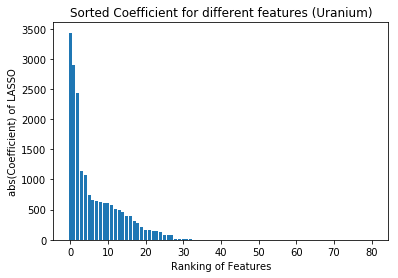

In [525]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(81), sort_array)

plt.xlabel('Ranking of Features')
plt.ylabel('abs(Coefficient) of LASSO')
plt.title(r'Sorted Coefficient for different features (Uranium)')

In [503]:
X.columns[index[::-1]]

Index(['manufacturing_1', 'pub_admin_1', 'prof_sci_tech_1', 'wholesale_trade',
       'agri_fish_hunt_1', 'prof_scientific_waste', 'retail_trade',
       'prof_scientific_waste_1', 'mgmt', 'retail_trade_1',
       'transport_warehouse_utilities_1', 'construction_1', 'construction',
       'agriculture', 'mining_quarrying_oilgas_extract', 'agriculture_1',
       'finance_insurance_realestate_1', 'total_prof_sci_mgmt_admin',
       'edu_health', 'edu_health_1', 'finance_insurance_realestate',
       'manufacturing', 'mgmt_1', 'mining_quarrying_oilgas_extract_1',
       'manufacturing_1', 'public_admin', 'other', 'arts_recreation',
       'utilities_1', 'year', 'public_admin_1', 'transport_utilities_1',
       'construction_1', 'year', 'fips_1', 'total_arts_ent_acc_food',
       'health_social', 'edu_serv', 'admin_sup', 'total_edu_health_social',
       'arts_ent_rec', 'retail_trade', 'prof_sci_tech', 'realest_rent_lease',
       'fin_ins', 'fin_ins_realest', 'information', 'utilities',
 

In [526]:
aa[::-1]

array([32, 53, 43, 57, 29, 62, 58, 76, 16, 72, 35, 69, 55, 54,  2, 68, 75,
       14, 63, 77, 61, 56, 44, 30, 70, 66, 65, 64, 37, 26, 80, 73, 31, 67,
       27, 21, 20, 19, 17, 18, 22,  6, 15, 13, 12, 11, 10,  9,  8,  7, 24,
        5,  4,  3,  1, 23, 40, 25, 28, 78, 74, 71, 60, 59, 52, 51, 50, 49,
       48, 47, 46, 45, 42, 41, 79, 39, 38, 36, 34, 33,  0])

In [531]:
clf_l.coef_[32]

-3433.3136961927103

In [532]:
clf_l.coef_[53]

2905.4348243932236

In [481]:
y_pred = clf_l.predict(X_test)
mean_squared_error(y_test, y_pred)

139419.92756517805

In [482]:
y_t_pred = clf_l.predict(X_train)
mean_squared_error(y_train, y_t_pred)

52076.60334842034

In [454]:
from sklearn.linear_model import ElasticNet
params = {'alpha' :[0.001, 0.01, 0.02, 0.03,0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1,0.2,1], 'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7]}
clf_l = GridSearchCV(cv=5, estimator = ElasticNet(), param_grid = params, scoring = 'neg_mean_squared_error')

clf_l.fit(X, y)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/pyth

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/pyth

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/pyth

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/pyth

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/pyth

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], 'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [455]:
clf_l.best_params_

{'alpha': 0.001, 'l1_ratio': 0.7}

In [456]:
params = {'alpha' :[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009], 'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7]}
clf_l = GridSearchCV(cv=5, estimator = ElasticNet(), param_grid = params, scoring = 'neg_mean_squared_error')

clf_l.fit(X, y)
clf_l.best_params_

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/pyth

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/pyth

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/pyth

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/pyth

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/pyth

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/pyth

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/pyth

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/pyth

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/pyth

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/pyth

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/pyth

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/pyth

{'alpha': 0.001, 'l1_ratio': 0.7}

In [463]:
clf_l = ElasticNet(alpha = 0, l1_ratio = 0.7)
clf_l.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=0, copy_X=True, fit_intercept=True, l1_ratio=0.6,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [464]:
y_pred = clf_l.predict(X_test)


mean_squared_error(y_test, y_pred)

135456.10175321007

In [465]:
y_t_pred = clf_l.predict(X_train)

mean_squared_error(y_train, y_t_pred)



51771.99043356526